In [210]:
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

In [211]:
from sklearn.preprocessing import LabelEncoder

In [212]:
#Take the columns names into a list
ColumnNames=['City1','City2','AverageFare','Distance','Averageweeklypassengers','Marketleadingairline','MarketshareLead','Averagefare','Lowpriceairline','MarketshareLow','Price']

In [214]:
#Since it is a fixed width file , read_fwf is advisable and there is no need to give col_specs, as the code will 
#consider first 100 lines and divide the columns based on the width
AirPass=pd.read_fwf('http://users.stat.ufl.edu/~winner/data/airq402.dat',names=ColumnNames)

In [215]:
AirPass.head(5)

,City1,City2,AverageFare,Distance,Averageweeklypassengers,Marketleadingairline,MarketshareLead,Averagefare,Lowpriceairline,MarketshareLow,Price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [216]:
AirPass.isna().any()

City1                      False
City2                      False
AverageFare                False
Distance                   False
Averageweeklypassengers    False
Marketleadingairline       False
MarketshareLead            False
Averagefare                False
Lowpriceairline            False
MarketshareLow             False
Price                      False
dtype: bool

In [217]:
AirPass.dtypes

City1                       object
City2                       object
AverageFare                float64
Distance                     int64
Averageweeklypassengers    float64
Marketleadingairline        object
MarketshareLead            float64
Averagefare                float64
Lowpriceairline             object
MarketshareLow             float64
Price                      float64
dtype: object

In [218]:
# since there are 4 columns with categorical variables , we use label encoder to convert it into numbers , also 
#we cant use onehotcoder as the number of categories are more and it will create more number of columsn if we go for 
#onehot coder and more number of columns will not fit our dataset and eventually the model.
labelencoder = LabelEncoder()


In [219]:
AirPass['City1'].nunique()

90

In [220]:
AirPass['City2'].nunique()

85

In [221]:
AirPass['Marketleadingairline'].nunique()

16

In [222]:
AirPass['Lowpriceairline'].nunique()

19

In [223]:
AirPass['City1'] = labelencoder.fit_transform(AirPass['City1'])

In [224]:
AirPass['City2'] = labelencoder.fit_transform(AirPass['City2'])

In [225]:
AirPass['Marketleadingairline'] = labelencoder.fit_transform(AirPass['Marketleadingairline'])

In [226]:
AirPass['Lowpriceairline'] = labelencoder.fit_transform(AirPass['Marketleadingairline'])

In [227]:
AirPass.head(5)

,City1,City2,AverageFare,Distance,Averageweeklypassengers,Marketleadingairline,MarketshareLead,Averagefare,Lowpriceairline,MarketshareLow,Price
0,16,0,114.47,528,424.56,6,70.19,111.03,6,70.19,111.03
1,16,40,122.47,860,276.84,6,75.10,123.09,6,17.23,118.94
2,2,0,214.42,852,215.76,4,78.89,223.98,4,2.77,167.12
3,2,7,69.40,288,606.84,14,96.97,68.86,14,96.97,68.86
4,2,52,158.13,723,313.04,12,39.79,161.36,12,15.34,145.42


In [228]:
Q1=AirPass.quantile(0.25)
Q3=AirPass.quantile(0.75)
IQR=Q3-Q1

In [229]:
Q3+(1.5*IQR)

City1                       117.12500
City2                       130.50000
AverageFare                 304.51875
Distance                   2801.00000
Averageweeklypassengers    1538.98500
Marketleadingairline         29.37500
MarketshareLead             114.01000
Averagefare                 321.31625
Lowpriceairline              29.37500
MarketshareLow              112.63875
Price                       250.67375
dtype: float64

In [230]:
Q1-((1.5*IQR))

City1                      -47.87500
City2                      -25.50000
AverageFare                 18.84875
Distance                  -795.00000
Averageweeklypassengers   -511.87500
Marketleadingairline       -11.62500
MarketshareLead              6.01000
Averagefare                  5.74625
Lowpriceairline            -11.62500
MarketshareLow             -46.47125
Price                       31.62375
dtype: float64

In [231]:
#Removing the Outliers , removing the outliers on the target columns as well as the number is very low when compared to the total data
#and it will be sufficient for the model
AirFinal=AirPass[~((AirPass<(Q1-(1.5*IQR)))|(AirPass>(Q3+(1.5*IQR)))).any(axis=1)]

In [232]:
AirFinal.shape

(885, 11)

In [233]:
#Finding out the correlation
AirFinal.corr()

,City1,City2,AverageFare,Distance,Averageweeklypassengers,Marketleadingairline,MarketshareLead,Averagefare,Lowpriceairline,MarketshareLow,Price
City1,1.000000,0.307054,-0.092398,0.030485,0.013192,0.043640,-0.068297,-0.112980,0.043640,0.095783,-0.028719
City2,0.307054,1.000000,-0.029294,0.150499,-0.037372,-0.013822,-0.080962,-0.039302,-0.013822,0.045622,0.036378
AverageFare,-0.092398,-0.029294,1.000000,0.522650,-0.197005,-0.321035,-0.207955,0.979713,-0.321035,-0.493555,0.840993
Distance,0.030485,0.150499,0.522650,1.000000,-0.129632,-0.139442,-0.547952,0.489721,-0.139442,-0.361519,0.539894
Averageweeklypassengers,0.013192,-0.037372,-0.197005,-0.129632,1.000000,-0.024811,0.021769,-0.163736,-0.024811,0.076176,-0.209018
Marketleadingairline,0.043640,-0.013822,-0.321035,-0.139442,-0.024811,1.000000,0.105175,-0.301472,1.000000,0.161220,-0.298722
MarketshareLead,-0.068297,-0.080962,-0.207955,-0.547952,0.021769,0.105175,1.000000,-0.193382,0.105175,0.281182,-0.314555
Averagefare,-0.112980,-0.039302,0.979713,0.489721,-0.163736,-0.301472,-0.193382,1.000000,-0.301472,-0.519442,0.794157
Lowpriceairline,0.043640,-0.013822,-0.321035,-0.139442,-0.024811,1.000000,0.105175,-0.301472,1.000000,0.161220,-0.298722
MarketshareLow,0.095783,0.045622,-0.493555,-0.361519,0.076176,0.161220,0.281182,-0.519442,0.161220,1.000000,-0.260912


In [234]:
air[abs(air['AverageFare'])<0.1]

,City1,City2,AverageFare,Distance,Averageweeklypassengers,Marketleadingairline,MarketshareLead,Averagefare,Lowpriceairline,MarketshareLow,Price
City1,1.000000,0.307054,-0.092398,0.030485,0.013192,0.043640,-0.068297,-0.112980,0.043640,0.095783,-0.028719
City2,0.307054,1.000000,-0.029294,0.150499,-0.037372,-0.013822,-0.080962,-0.039302,-0.013822,0.045622,0.036378


In [235]:
#Dropping the city1,city2 columns as it has no correlation with the 'AverageFare'
AirFinal = AirFinal.drop(['City1','City2'],axis=1)

In [236]:
AirFinal.head(5)

,AverageFare,Distance,Averageweeklypassengers,Marketleadingairline,MarketshareLead,Averagefare,Lowpriceairline,MarketshareLow,Price
0,114.47,528,424.56,6,70.19,111.03,6,70.19,111.03
1,122.47,860,276.84,6,75.10,123.09,6,17.23,118.94
2,214.42,852,215.76,4,78.89,223.98,4,2.77,167.12
3,69.40,288,606.84,14,96.97,68.86,14,96.97,68.86
4,158.13,723,313.04,12,39.79,161.36,12,15.34,145.42


In [237]:
AirFinal.dtypes

AverageFare                float64
Distance                     int64
Averageweeklypassengers    float64
Marketleadingairline         int32
MarketshareLead            float64
Averagefare                float64
Lowpriceairline              int64
MarketshareLow             float64
Price                      float64
dtype: object

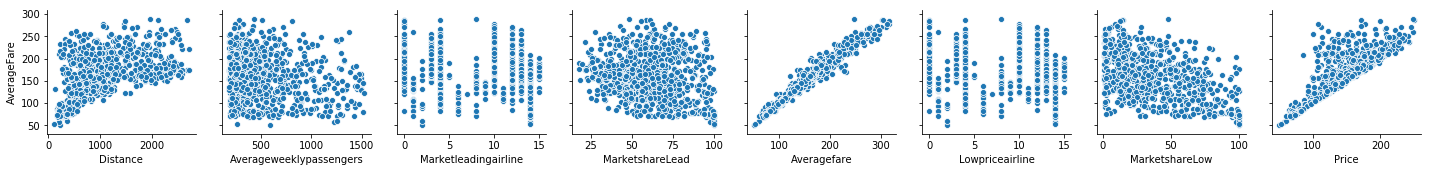

In [238]:
sns.pairplot(AirFinal,x_vars=["Distance", "Averageweeklypassengers","Marketleadingairline","MarketshareLead","Averagefare","Lowpriceairline","MarketshareLow","Price"],y_vars=["AverageFare"])

In [239]:
X=AirFinal.drop('AverageFare',axis=1)

In [240]:
y=AirFinal['AverageFare']

In [241]:
from sklearn.model_selection import train_test_split

In [242]:
#Split the data set into train and test sizes of 80,20 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [243]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [244]:

for idx, col_name in enumerate(X_train.columns):
    
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[()][idx]))

The coefficient for Distance is 0.0028261893470589656
The coefficient for Averageweeklypassengers is -0.0037389969499806884
The coefficient for Marketleadingairline is -0.10286945104713319
The coefficient for MarketshareLead is 0.0812812300151868
The coefficient for Averagefare is 0.7260405648113265
The coefficient for Lowpriceairline is -0.1028694510471333
The coefficient for MarketshareLow is -0.030523120169292907
The coefficient for Price is 0.22635042887649331


In [245]:
intercept = regression_model.intercept_[()]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 6.948875557668174


In [246]:
#97% of variablity in y is explained by X
regression_model.score(X_train, y_train)

0.9729084103261254

In [247]:
regression_model.score(X_test, y_test)

0.9700789082944252